In [7]:
#importing all the required libraries
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import urllib
from PIL import Image

In [8]:

#these are all the classes, that faster RCNN can detect
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [9]:
#importing the faster RCNN model and saving it to a variable called model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval() # this puts all the layers into evaluation mode.

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)

In [14]:

#method to predict the probability of each predicted feature
def prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform = transforms.Compose([transforms.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  pred = model([img]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
  pred_score = list(pred[0]['scores'].detach().numpy())#?
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_class = pred_class[:pred_t+1]
  pred_score = pred_score[:pred_t+1]
  print(pred_class)
  print(pred_score)
  for i in range(len(pred_class)):
    print(pred_class[i], pred_score[i])
  return pred_class,pred_score



horse 0.9986137
person 0.99367684
dog 0.9595114
(['horse', 'person', 'dog'], [0.9986137, 0.99367684, 0.9595114])
finished


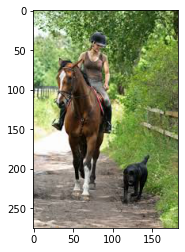

In [21]:

img = Image.open("images/newimage.jpeg")#Accessing the image file so it can be displayed
plt.imshow(img)#this will display the image that is being processed
#the prediction method returns 2 outputs(the predicted classes and their accuracy), variable predict will store these values.
#the prediction method takes in 2 parameters. The image file and the accuracy thershold
predict = prediction("images/newimage.jpeg",threshold=0.7)
#this prints out the classes and their accuracy
print(predict)

print("finished")